# Linear gradient my own implementation

https://github.com/leventbass/linear_regression/blob/master/Linear_Regression.ipynb

In [20]:
from sklearn.datasets import load_boston


In [21]:
import numpy as np
import random
import tqdm
import matplotlib.pyplot as plt
from typing import List
from IPython import embed
Vector=List[float]

In [22]:
dataset = load_boston()

X = dataset.data
y = dataset.target[:,np.newaxis]

print("Total samples in our dataset is: {}".format(X.shape[0]))
print(X.shape)

Total samples in our dataset is: 506
(506, 13)


In [23]:
def cost_function(X:np.ndarray, y:Vector, params:Vector) -> float:
    n_samples = len(y)
    y_p = X @ params
    #print(sum(params**2*0.3))
    #print(1/(n_samples))*np.sum((y_p-y)**2)
    print(sum(params**2*0.3))
    return (1/(n_samples))*np.sum((y_p-y)**2)+sum(params**2*0.3)

def gradient_descent(X:np.ndarray, y:Vector, params:Vector, learning_rate:float, n_iters:float,batch_size:int=1) ->tuple:
    guess = [random.random() for _ in X[0]]
    guess = np.asarray(guess)
    guess =np.reshape(guess, (len(guess), 1))  

    cost_history=np.zeros((n_iters,1))
    
    for _ in tqdm.trange(n_iters,desc='gradient descent'):
        gradient = -1/len(X) * 2*X.T @ (X @ guess - y)
        gradient_step=gradient*learning_rate
        guess=np.add(guess,gradient_step)
        cost=cost_function(X,y,guess)
        cost_history[_]=cost
    return (cost_history, guess)

In [24]:
n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

# We are adding m here in y=kx+m

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

gradient descent: 100%|██████████| 50/50 [00:00<00:00, 1872.31it/s]

[0.]
Initial cost is:  [592.146917] 

[1.51028546]
[1.86165676]
[2.37257505]
[3.01785542]
[3.77761568]
[4.63602831]
[5.58036757]
[6.60028273]
[7.68724421]
[8.83412213]
[10.03486593]
[11.28426111]
[12.57774485]
[13.91126629]
[15.28118099]
[16.68417114]
[18.11718528]
[19.57739291]
[21.06215012]
[22.56897371]
[24.09552146]
[25.63957714]
[27.19903903]
[28.77191092]
[30.35629509]
[31.95038658]
[33.55246861]
[35.16090853]
[36.77415449]
[38.3907323]
[40.00924269]
[41.62835869]
[43.24682312]
[44.86344623]
[46.47710334]
[48.08673261]
[49.69133277]
[51.28996095]
[52.8817305]
[54.46580889]
[56.04141559]
[57.60782003]
[59.16433961]
[60.71033767]
[62.24522162]
[63.76844105]
[65.27948587]
[66.77788457]
[68.26320246]
[69.73503999]
Optimal parameters are: 
 [[14.61775809]
 [-0.51492978]
 [ 0.98451515]
 [-0.46341177]
 [ 0.89715066]
 [-0.15255679]
 [ 3.02070384]
 [-0.09137819]
 [-0.51602934]
 [ 0.21790504]
 [-0.67025245]
 [-1.16135624]
 [ 1.13494799]
 [-1.9902491 ]] 

Final cost is:  [159.52194319]


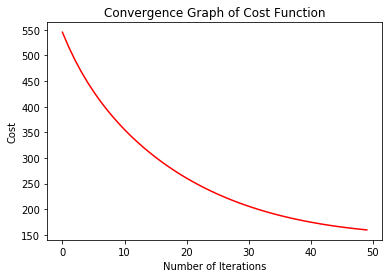

In [25]:
n_iters = 50
learning_rate = 0.01

initial_cost = cost_function(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()



## Creating a class 

In [ ]:
class LinearRegression_1():
    def __init__(self, X, y, learning_rate=0.03, n_iter=1500):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        
        guess = [random.random() for _ in self.X[0]]
        guess = np.asarray(guess)
        guess =np.reshape(guess, (len(guess), 1))  


        for _ in tqdm.trange(self.n_iter,desc='gradient descent'):
            gradient = -1/len(self.X) * 2*self.X.T @ (self.X @ guess - self.y)
            gradient_step=gradient*self.learning_rate
            guess=np.add(guess,gradient_step)

        self.params=guess
        self.intercept_ = guess[0]
        self.coef_ = guess[1:]
        
        return self
    
    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd


dataset = load_boston()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

our_regressor = LinearRegression_1(X_train, y_train).fit()
sklearn_regressor = LinearRegression().fit(X_train, y_train)

our_train_accuracy = our_regressor.score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

our_test_accuracy = our_regressor.score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[our_train_accuracy, sklearn_train_accuracy],[our_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

In [ ]:
import numpy as np
test=np.ndarray([1,2,3,4,5])
test